<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project6/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, silhouette_score
from sklearn.cluster import KMeans

In [3]:
datapath = os.path.join("datasets", "letters", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project6/fetal_health.csv"

urllib.request.urlretrieve(file_path, datapath + "fetal_health.csv")
health_data = pd.read_csv(datapath + "fetal_health.csv", thousands=',')

print(health_data.shape)
print(health_data.head())

(2126, 22)
   baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]


# Preliminary Data Analysis

**Check for Missing Values**

In [4]:
print(health_data.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
print(health_data.dtypes)

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
health_data.corr()['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

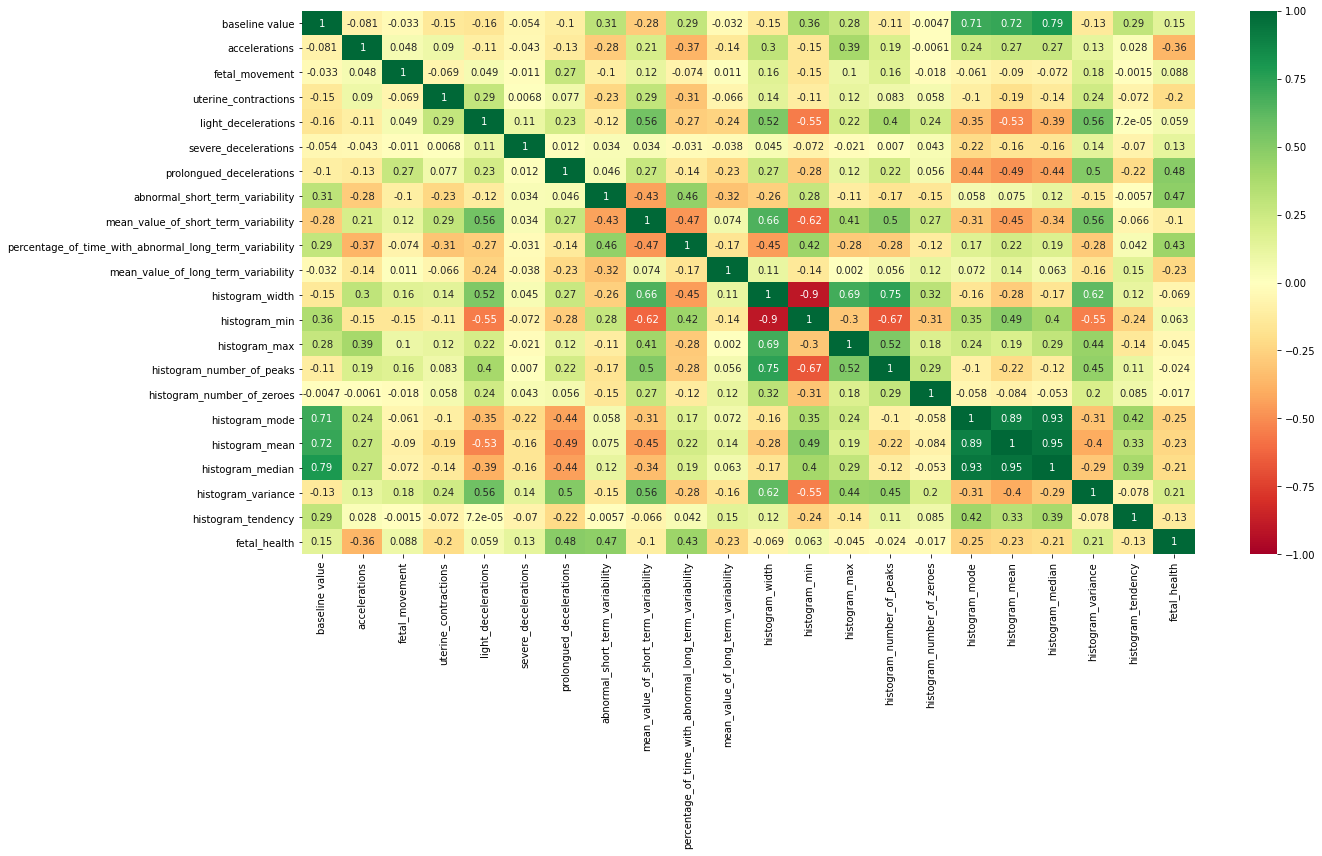

In [7]:
corr_full = health_data.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr_full,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

**Heatmap Correlation With Only Target Class**

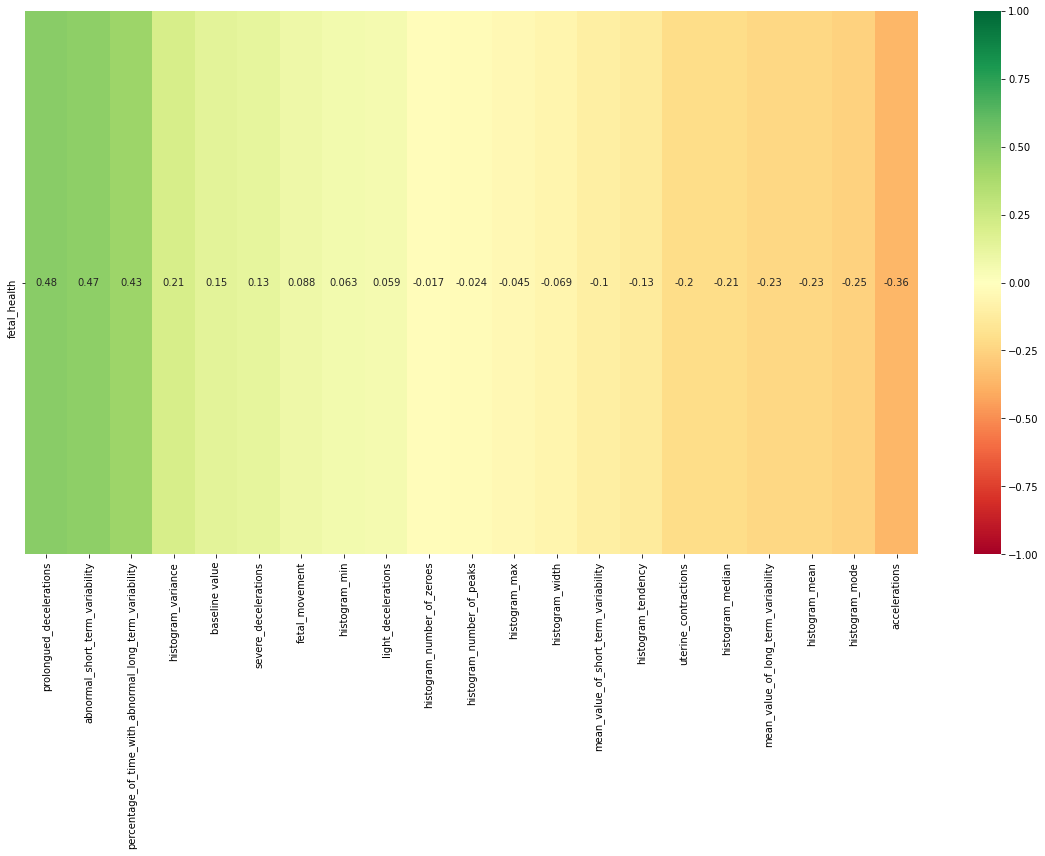

In [ ]:
corr = pd.DataFrame([health_data.corr(method="pearson")['fetal_health'].sort_values(ascending=False)]).drop(columns = ['fetal_health'])
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

**Correlation as a Bar Plot**

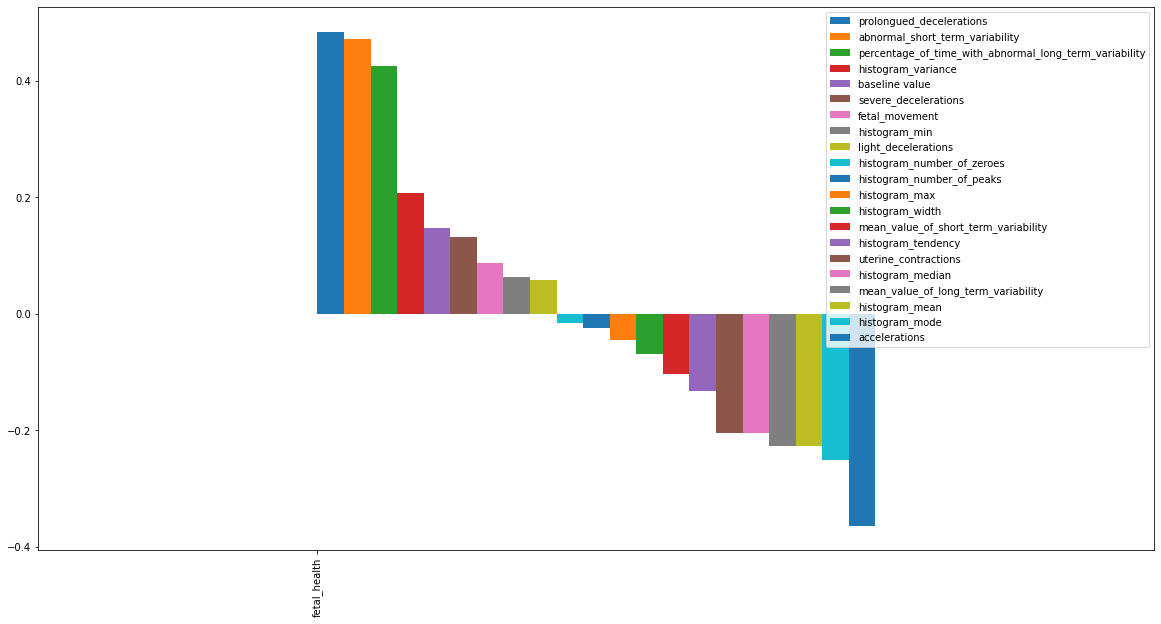

In [ ]:
corr.plot(kind='bar', figsize=(20,10), align='edge')

**Histograms**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b4c55ce90>,
      dtype=object)

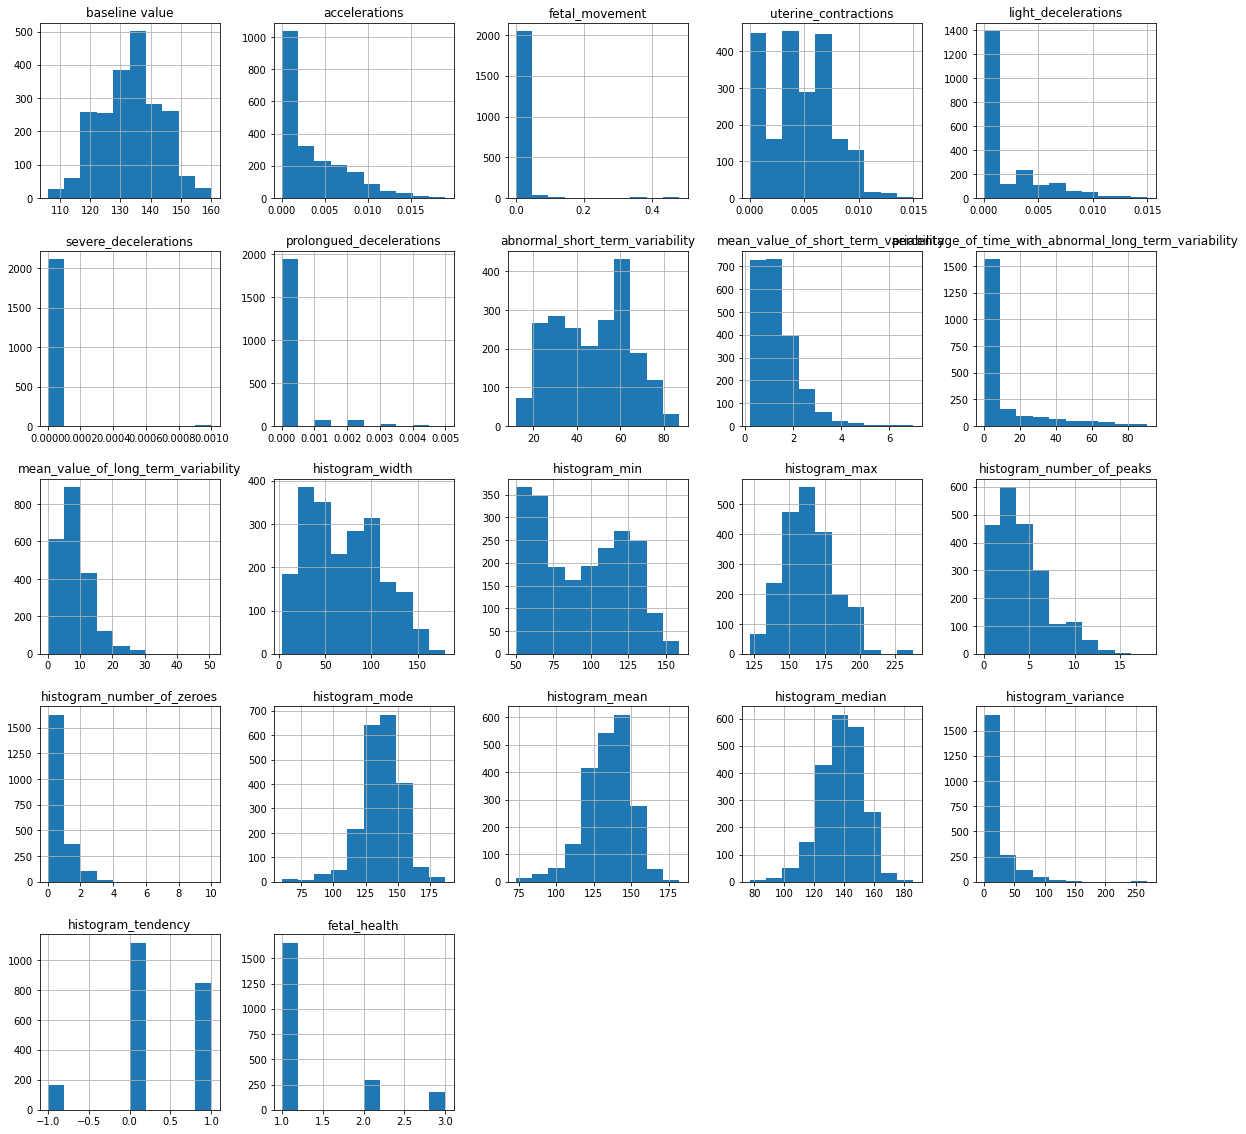

In [ ]:
health_data.hist(figsize=(20, 20))

**Count of Each Target Class**


---
Normal health is overrepresentd by a large amount


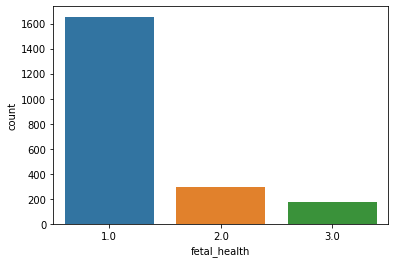

In [ ]:
sns.countplot(x= health_data.fetal_health)

# Train Sequential Neural Network

**Encode Target Class as Labels**

---
Targets are currently [1,2,3].  Need [0,1,2] for training/prediction.


In [8]:
Y_preproc = health_data['fetal_health'].values

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y_preproc)

**Scale Independent Variables**

In [9]:
X_preproc = health_data.drop(columns = ['fetal_health']).values

scaler = StandardScaler()
X = scaler.fit_transform(X_preproc)

**Split Training and Test Data**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

**Create Sequential Model**

In [13]:
model = keras.models.Sequential([
        keras.layers.Dense(64, input_dim=X_train.shape[1], activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 3,587
Trainable params: 3,587
Non-trainable params: 0
_________________________________________________________________


**Fit Model to Training Data**

In [17]:
history = model.fit(x=X_train, y=Y_train, epochs=150, batch_size=128, validation_data=(X_test, Y_test), verbose=0)

**Accuracy and Loss Over Training Epochs**

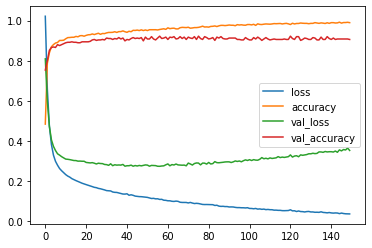

In [18]:
pd.DataFrame(history.history).plot()

**Predict Test Data**

In [19]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)

**Confusion Matrix**

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       326
           1       0.73      0.71      0.72        58
           2       0.86      0.76      0.81        42

    accuracy                           0.91       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.91      0.90       426



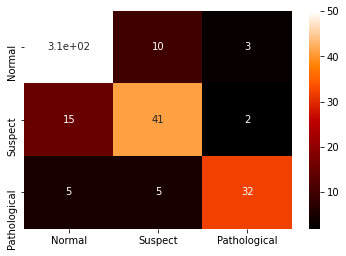

In [36]:
cm = confusion_matrix(Y_test, Y_pred)
labels = ['Normal', 'Suspect', 'Pathological']
print(classification_report(Y_test, Y_pred))
sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=labels, yticklabels=labels, vmax=50)

**Define Baseline Model Function For Evaluation**

---
Identical to previous model, just used for cross validation.


In [21]:
def create_baseline():
  model = keras.models.Sequential([
        keras.layers.Dense(64, input_dim=X_train.shape[1], activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
  ])
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

**Cross Validate Model**

---
Usually results in an accuracy between 92.0 and 92.5, this varies with runs due to the random anture of the model.


In [22]:
estimator = KerasClassifier(build_fn=create_baseline, epochs = 150, verbose = 0)
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 92.38% (+/- 0.30%)


# Optimize Using Grid Search

**Define Model Builder Function**

---
Model builder allows the Grid Seach function to change the number of layers in the Sequential Model.  Neurons count increases exponentially with each layer of the model.


In [14]:
def model_builder(input_dim=21, hidden_layers=2, optimizer='adam'):
  model = Sequential()
  i = hidden_layers
  # Add input layer, don't pass hidden_layers = 0 to this function, it won't work
  model.add(Dense(2**(i+3), input_dim=input_dim, activation='relu'))  # Each hidden layer has a power of 2 neurons, with the lowest layer having 16
  i=i-1
  while(i > 0):
    #Add middle hidden layers
    model.add(Dense(2**(i+3), activation="relu"))
    i = i-1
  # Add output layer
  model.add(Dense(3, activation='sigmoid'))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

**Define Cross Validator Function**

In [16]:
def cross_validate_classifier(estimator):
  kfold = StratifiedKFold(n_splits=3, shuffle=True)
  return cross_val_score(estimator, X, Y, cv=kfold)

**Grid Search - Determine Optimal Number of Layers and Batch Size**

In [17]:
estimator = KerasClassifier(build_fn=model_builder, epochs = 150, verbose = 0, input_dim=X_train.shape[1], optimizer='adam')
hidden_layers = np.arange(1, 8).tolist()
batch_size = np.arange(10, 200, 10).tolist()
params = {'batch_size': batch_size, 'hidden_layers': hidden_layers}
grid_search = GridSearchCV(estimator, params, n_jobs=-1, cv=3)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f58a7c144d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                        110, 120, 130, 140, 150, 160, 170, 180,
                                        190],
                         'hidden_layers': [1, 2, 3, 4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print(grid_search.best_params_)

{'batch_size': 110, 'hidden_layers': 7}


**Cross Validate Optimized Model**

In [19]:
opt_estimator = KerasClassifier(build_fn=model_builder, epochs = 150, verbose = 0, input_dim=X_train.shape[1], optimizer='adam', batch_size = 110, hidden_layers = 7)
opt_results = cross_validate_classifier(opt_estimator)
print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (opt_results.mean()*100, opt_results.std()*100))

Baseline accuracy: 91.39% (+/- 1.02%)


In [20]:
opt_estimator.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test))

In [21]:
opt_estimator.model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1024)              22528     
_________________________________________________________________
dense_39 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 16)               

**Loss and Accuracy of Optimized Model**

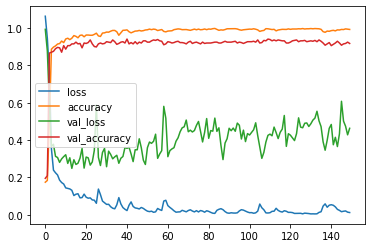

In [22]:
pd.DataFrame(opt_estimator.model.history.history).plot()

**Predict Test Classes With Optimized Model, Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       326
           1       0.81      0.66      0.72        58
           2       0.86      0.88      0.87        42

    accuracy                           0.92       426
   macro avg       0.87      0.84      0.85       426
weighted avg       0.91      0.92      0.91       426

0.9178403755868545


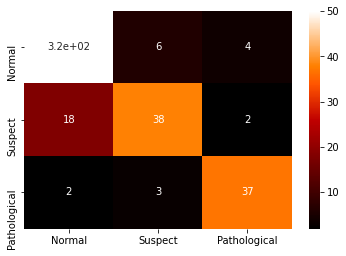

In [23]:
opt_y_pred = opt_estimator.predict(X_test)
cm = confusion_matrix(Y_test, opt_y_pred)
labels = ['Normal', 'Suspect', 'Pathological']
print(classification_report(Y_test, opt_y_pred))
print(accuracy_score(Y_test, opt_y_pred))
sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=labels, yticklabels=labels, vmax=50)

# Compute Accuracy Scores by Layer

**Increase Number of Layers from One to Ten - Compute Accuracy for Each Model**

In [24]:
accuracy_scores = list()
for i in range(1, 10):
  estimator = KerasClassifier(build_fn=model_builder, epochs = 150, verbose = 0, input_dim=X_train.shape[1], optimizer='adam', batch_size = 120, hidden_layers = i)
  estimator.fit(X_train, Y_train)
  Y_pred = estimator.predict(X_test)
  accuracy_scores.append(accuracy_score(Y_test, Y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
print(accuracy_scores)

[0.9014084507042254, 0.9248826291079812, 0.9154929577464789, 0.92018779342723, 0.931924882629108, 0.931924882629108, 0.9272300469483568, 0.9342723004694836, 0.9295774647887324]


**Plot Accuracy of Models By Number of Layers**

<BarContainer object of 9 artists>

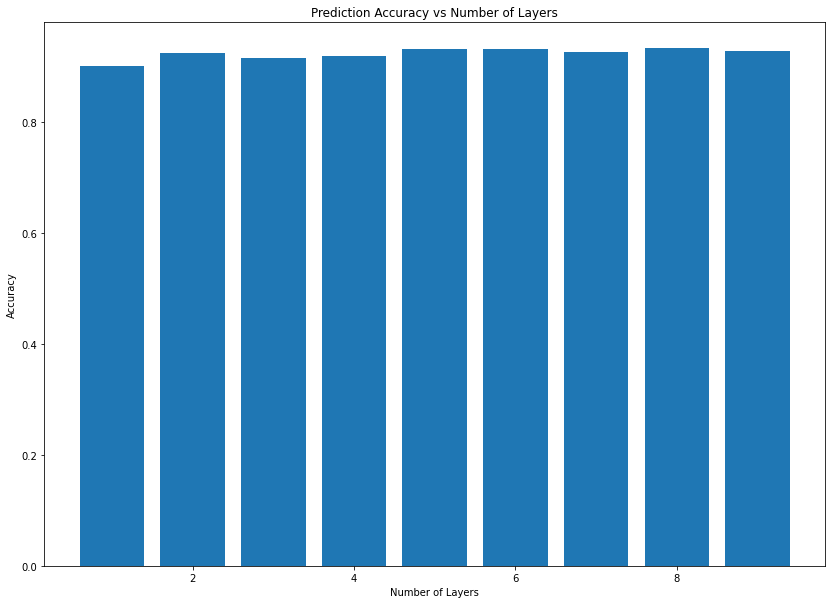

In [53]:
x_labels = np.arange(1, 10)
plt.figure( figsize=(14,10) )
plt.title( 'Prediction Accuracy vs Number of Layers' )
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.bar( x_labels, accuracy_scores )

# Summary

*   A sequential neural model was created and trained on fetal health data. The data has three target classes: 1-Normal, 2-Suspect, 3-Pathological.  The model was cross validated and found to have roughly 92% accuracy.  Its accuracy predicting test data was 91%.
*   A grid search was used to find the optimum number of hidden layers and optimal batch size of the model.  The number of layers was found to be 7 (this was the highest number in the search) and the batch size was 110.
*   The optimized model had a cross validation accuracy of 91% and a test data accuracy of 92%.
*   In an attempt to determine the affect of the number of hidden layers in the model had on the accuracy of the model, 9 models were created with 1-9 hidden layers.  The prediction accuracy of each was recorded and plotted.  The prediction accuracy did not show any significant increase past 5 layers where it achieved 93% accuracy.  The slight differences in accuracy in models with 5-9 layers is likely due to the stochastic nature of the models. 

